In [ ]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Ejercicio 1

In [ ]:
from sklearn.decomposition import FactorAnalysis

In [ ]:
columnas = ['pan','vegetales','frutas','carne','pollo y aves','leche','vino']
dict_ = {}
for index, value in enumerate(columnas):
    dict_[index+1] = value

dict_[0] = 'Tipo de Familia'

In [ ]:
food = pd.read_csv('food.dat',header=None,sep=' ').rename(columns=dict_)
food

,Tipo de Familia,pan,vegetales,frutas,carne,pollo y aves,leche,vino
0,MA2,332,428,354,1437,526,247,427
1,EM2,293,559,388,1527,567,239,258
2,CA2,372,767,562,1948,927,235,433
3,MA3,406,563,341,1507,544,324,407
4,EM3,386,608,396,1501,558,319,363
5,CA3,438,843,689,2345,1148,243,341
6,MA4,534,660,367,1620,638,414,407
7,EM4,460,699,484,1856,762,400,416
8,CA4,385,789,621,2366,1149,304,282
9,MA5,655,776,423,1848,759,495,486


In [ ]:
y_ = food.iloc[:,0].values.reshape((12,1))

In [ ]:
y = ['MA', 'EM', 'CA', 'MA', 'EM', 'CA', 'MA', 'EM', 'CA','MA', 'EM', 'CA']
for index, value in enumerate(y):
    if value == 'MA':
        y[index] = 0
    elif value == 'EM':
        y[index] = 1
    else:
        y[index] = 2

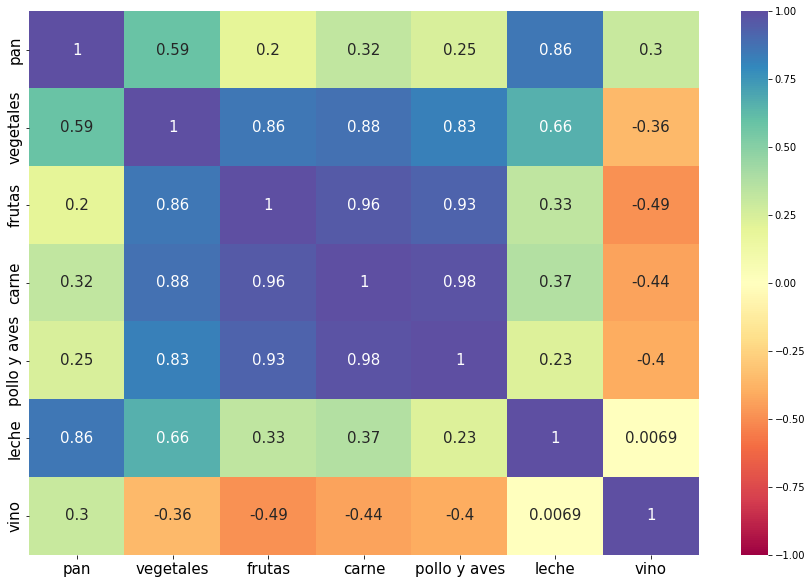

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(food.corr(),annot=True,annot_kws={'fontsize':15},vmin=-1, vmax=1,cmap='Spectral')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
#1 -> 6
#2 -> 3,4,5
#3 -> 2,4,5
#4 -> 2,3,5
#5 -> 2,3,4
#6 -> 1
#7 -> None
#Grupos posibles {1,6}, {2,3,4,5}, {7}

In [ ]:
#Obtenemos las variables
X = food.iloc[:,1:].values

#Estandarisamos las variables
SC = StandardScaler()
X_std = SC.fit_transform(X)

In [ ]:
#Vemos que porcentaje de la varianza explicada podemos obtener tomas n componentes
value, vec = np.linalg.eig(np.corrcoef(X_std.T))
value_ = np.sort(value)[::-1]
componentes = 3
varianza_explicada = np.sum(value_[:componentes])/value_.sum()
varianza_explicada

0.9706234158159143

In [ ]:
#Transformamos nuestros datos usando las componenes elegidas
FA = FactorAnalysis(n_components = 3,rotation='varimax')
X_FA = FA.fit_transform(X_std)
X_FA

array([[-1.07492716, -0.90119099,  0.30070703],
       [-0.86403563, -1.09362386,  1.09429429],
       [ 0.54578663, -1.12828213, -0.83952786],
       [-1.04941437, -0.15223751,  0.23842439],
       [-1.00692639, -0.28062287,  0.45501561],
       [ 1.52494151, -0.94952195, -1.11774579],
       [-0.78966141,  0.75967512, -0.79948876],
       [-0.1885647 ,  0.32302927,  0.25872767],
       [ 1.48992528, -0.85734686, -0.10742586],
       [-0.33207614,  1.63510467, -1.48809973],
       [ 0.22771056,  1.39951635, -0.16676895],
       [ 1.51724183,  1.24550075,  2.17188797]])

In [ ]:
from mpl_toolkits import mplot3d

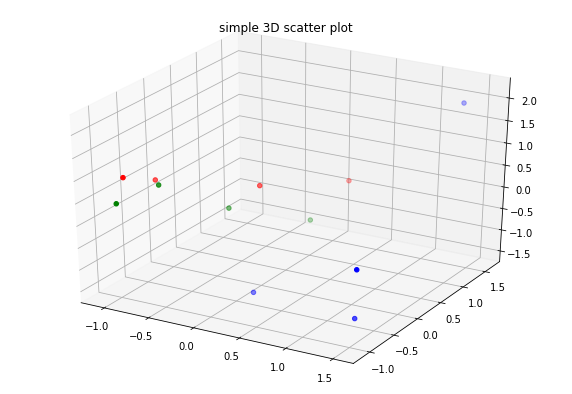

In [ ]:
x1 = X_FA[[0,3,6,9],0]
y1 = X_FA[[0,3,6,9],1]
z1 = X_FA[[0,3,6,9],2]

x2 = X_FA[[1,4,7,10],0]
y2 = X_FA[[1,4,7,10],1]
z2 = X_FA[[1,4,7,10],2]

x3 = X_FA[[2,5,8,11],0]
y3 = X_FA[[2,5,8,11],1]
z3 = X_FA[[2,5,8,11],2]

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x1, y1, z1, color = "green")
ax.scatter3D(x2, y2, z2, color = "red")
ax.scatter3D(x3, y3, z3, color = "blue")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

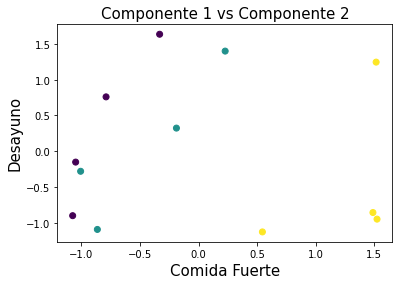

In [ ]:
plt.title('Componente 1 vs Componente 2',fontsize=15)
plt.scatter(X_FA[:,0],X_FA[:,1],c=y)
plt.xlabel('Comida Fuerte',fontsize=15)
plt.ylabel('Desayuno',fontsize=15)
plt.show()

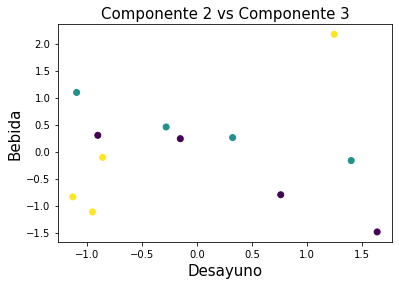

In [ ]:
plt.title('Componente 2 vs Componente 3',fontsize=15)
plt.scatter(X_FA[:,1],X_FA[:,2],c=y)
plt.xlabel('Desayuno',fontsize=15)
plt.ylabel('Bebida',fontsize=15)
plt.show()

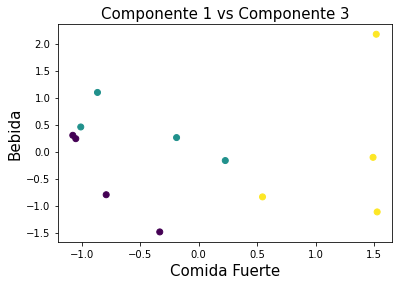

In [ ]:
plt.title('Componente 1 vs Componente 3',fontsize=15)
plt.scatter(X_FA[:,0],X_FA[:,2],c=y)
plt.xlabel('Comida Fuerte',fontsize=15)
plt.ylabel('Bebida',fontsize=15)
plt.show()

In [ ]:
columnas = np.array(columnas).reshape((7,1))

In [ ]:
pd.DataFrame(np.concatenate((columnas,FA.components_.T),axis=1))

# De los resultados podemos ver que la primer componente puede estar relacionada con 'comidas fuertes'
# Mientras que la seguna componente puede estar relacionada con el desayuno
# Mientras que la tercer componente puede estar relacionada con las bebidas para comida

,0,1,2,3
0,pan,0.16915711927964786,0.9167574302464349,-0.3345364045707216
1,vegetales,0.7885439505652783,0.533328871966908,0.08990403935414862
2,frutas,0.9275456893765472,0.14307273212778363,0.2748327246876254
3,carne,0.9727755795998266,0.20593373885840136,0.09653117877599666
4,pollo y aves,0.9956864792115584,0.07692318357308713,-0.027668108203317287
5,leche,0.16417627622294886,0.9641479566405052,0.16689453701162624
6,vino,-0.43135051395474727,0.18612781036493467,-0.5812739024537299


In [ ]:
resultados = pd.DataFrame(np.concatenate((y_,X_FA),axis=1))
resultados

,0,1,2,3
0,MA2,-1.074927,-0.901191,0.300707
1,EM2,-0.864036,-1.093624,1.094294
2,CA2,0.545787,-1.128282,-0.839528
3,MA3,-1.049414,-0.152238,0.238424
4,EM3,-1.006926,-0.280623,0.455016
5,CA3,1.524942,-0.949522,-1.117746
6,MA4,-0.789661,0.759675,-0.799489
7,EM4,-0.188565,0.323029,0.258728
8,CA4,1.489925,-0.857347,-0.107426
9,MA5,-0.332076,1.635105,-1.4881


In [ ]:
resultados.iloc[[0,3,6,9],:]

,0,1,2,3
0,MA2,-1.074927,-0.901191,0.300707
3,MA3,-1.049414,-0.152238,0.238424
6,MA4,-0.789661,0.759675,-0.799489
9,MA5,-0.332076,1.635105,-1.4881


In [ ]:
resultados.iloc[[1,4,7,10],:]

,0,1,2,3
1,EM2,-0.864036,-1.093624,1.094294
4,EM3,-1.006926,-0.280623,0.455016
7,EM4,-0.188565,0.323029,0.258728
10,EM5,0.227711,1.399516,-0.166769


In [ ]:
resultados.iloc[[2,5,8,11],:]

,0,1,2,3
2,CA2,0.545787,-1.128282,-0.839528
5,CA3,1.524942,-0.949522,-1.117746
8,CA4,1.489925,-0.857347,-0.107426
11,CA5,1.517242,1.245501,2.171888


# Ejercico 2

In [ ]:
USArrest = pd.read_csv('USArrests.txt',sep=' ').reset_index()
USArrest

,index,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
X = USArrest.iloc[:,1:].values
SC2 = StandardScaler()
X_std = SC2.fit_transform(X)

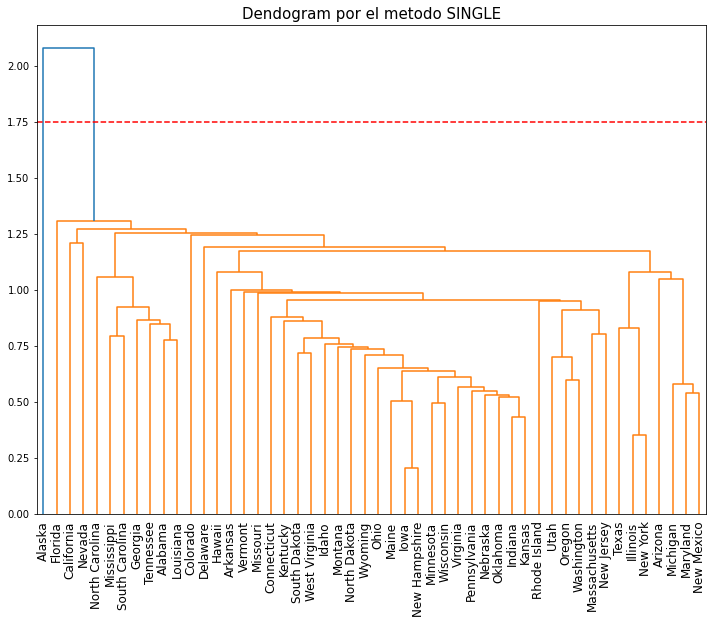

In [ ]:
metodo = 'single'

plt.figure(figsize=(12,9))
plt.title("Dendogram por el metodo " + metodo.upper(),fontsize=15)
dend = shc.dendrogram(shc.linkage(X_std, method=metodo))

estados = []
x = []
x_ = 5
for j in dend['leaves']:
    estados.append(USArrest.iloc[j,0])
    x.append(x_)
    x_ += 10

plt.axhline(y=1.75,color="r",linestyle="--")
plt.xticks(x,estados,rotation='vertical',fontsize=12)
plt.show()

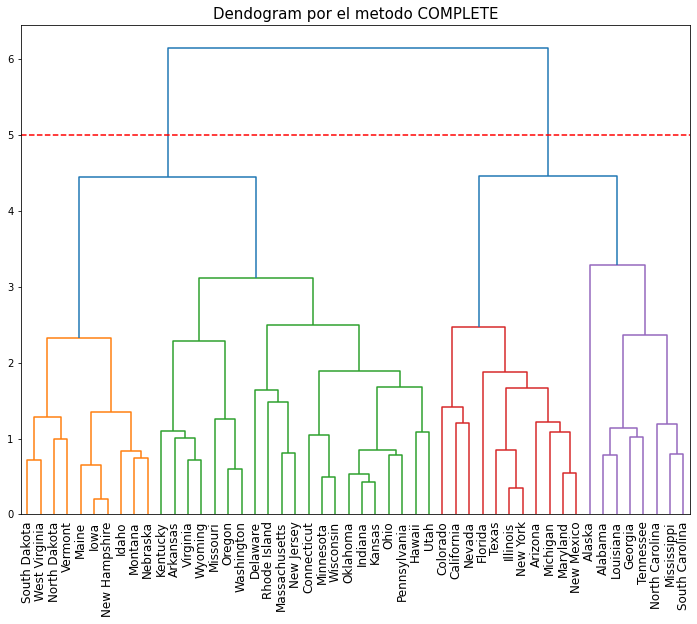

In [ ]:
metodo = 'complete'

plt.figure(figsize=(12,9))
plt.title("Dendogram por el metodo " + metodo.upper(),fontsize=15)
dend = shc.dendrogram(shc.linkage(X_std, method=metodo))
plt.axhline(y=5,color="r",linestyle="--")

estados = []
x = []
x_ = 5
for j in dend['leaves']:
    estados.append(USArrest.iloc[j,0])
    x.append(x_)
    x_ += 10

plt.xticks(x,estados,rotation='vertical',fontsize=12)
plt.show()

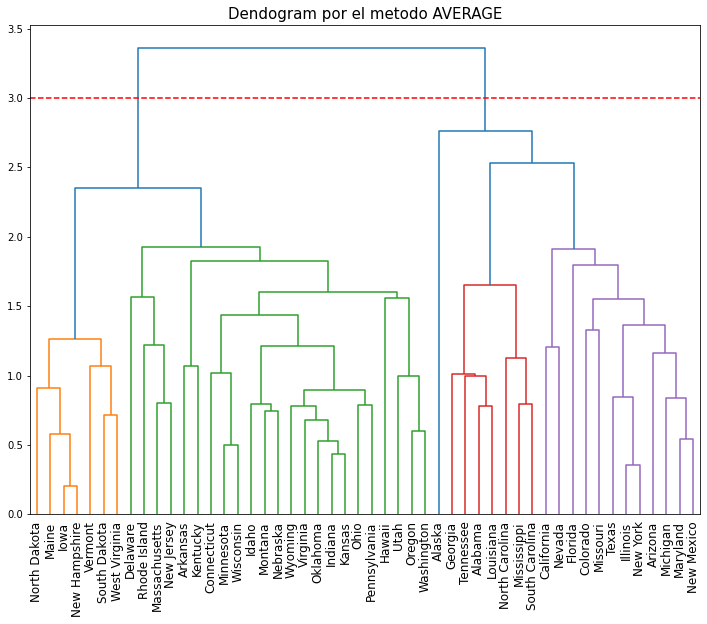

In [ ]:
metodo = 'average'

plt.figure(figsize=(12,9))
plt.title("Dendogram por el metodo " + metodo.upper(),fontsize=15)
dend = shc.dendrogram(shc.linkage(X_std, method=metodo))
plt.axhline(y=3,color="r",linestyle="--")

estados = []
x = []
x_ = 5
for j in dend['leaves']:
    estados.append(USArrest.iloc[j,0])
    x.append(x_)
    x_ += 10


plt.xticks(x,estados,rotation='vertical',fontsize=12)
plt.show()

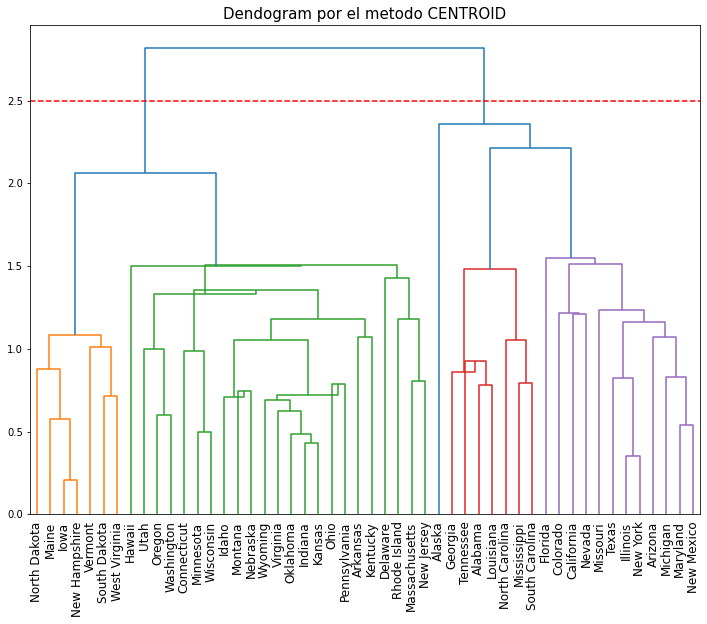

In [ ]:
metodo = 'centroid'

plt.figure(figsize=(12,9))
plt.title("Dendogram por el metodo " + metodo.upper(),fontsize=15)
dend = shc.dendrogram(shc.linkage(X_std, method=metodo))
plt.axhline(y=2.5,color="r",linestyle="--")

estados = []
x = []
x_ = 5
for j in dend['leaves']:
    estados.append(USArrest.iloc[j,0])
    x.append(x_)
    x_ += 10


plt.xticks(x,estados,rotation='vertical',fontsize=12)
plt.show()

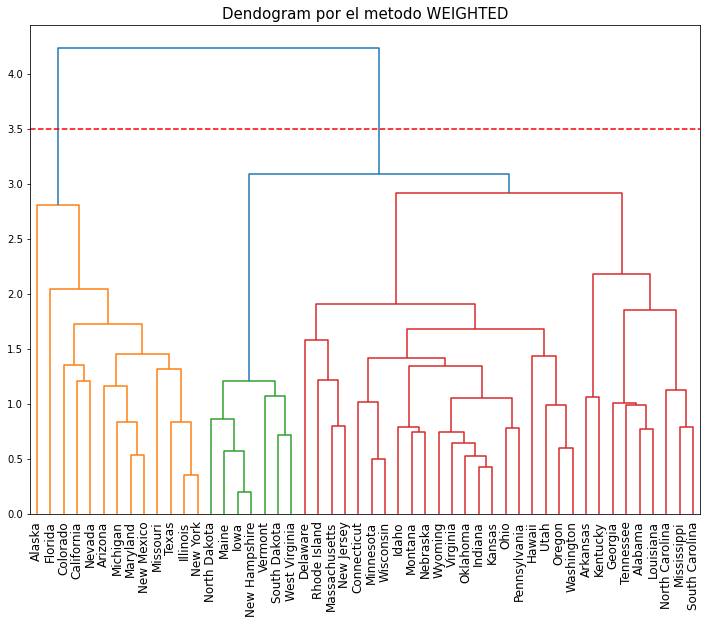

In [ ]:
metodo = 'weighted'

plt.figure(figsize=(12,9))
plt.title("Dendogram por el metodo " + metodo.upper(),fontsize=15)
dend = shc.dendrogram(shc.linkage(X_std, method=metodo))
plt.axhline(y=3.5,color="r",linestyle="--")

estados = []
x = []
x_ = 5
for j in dend['leaves']:
    estados.append(USArrest.iloc[j,0])
    x.append(x_)
    x_ += 10

plt.xticks(x,estados,rotation='vertical',fontsize=12)
plt.show()

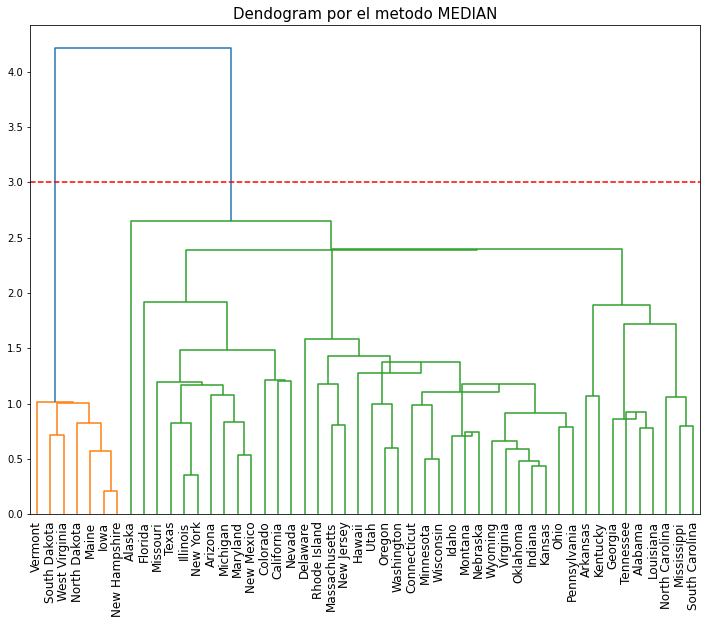

In [ ]:
metodo = 'median'

plt.figure(figsize=(12,9))
plt.title("Dendogram por el metodo " + metodo.upper(),fontsize=15)
dend = shc.dendrogram(shc.linkage(X_std, method=metodo))
plt.axhline(y=3,color="r",linestyle="--")

estados = []
x = []
x_ = 5
for j in dend['leaves']:
    estados.append(USArrest.iloc[j,0])
    x.append(x_)
    x_ += 10

plt.xticks(x,estados,rotation='vertical',fontsize=12)
plt.show()

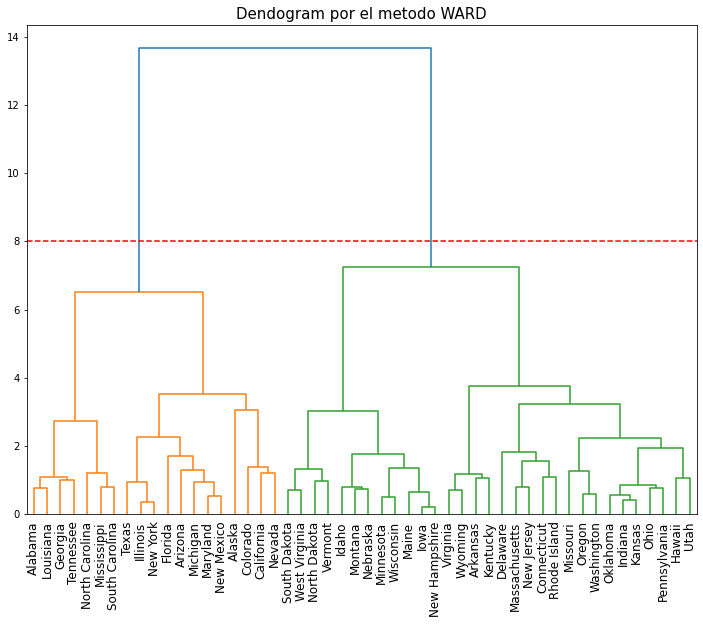

In [ ]:
metodo = 'ward'

plt.figure(figsize=(12,9))
plt.title("Dendogram por el metodo " + metodo.upper(),fontsize=15)
dend = shc.dendrogram(shc.linkage(X_std, method=metodo))
plt.axhline(y=8,color="r",linestyle="--")

estados = []
x = []
x_ = 5
for j in dend['leaves']:
    estados.append(USArrest.iloc[j,0])
    x.append(x_)
    x_ += 10

plt.xticks(x,estados,rotation='vertical',fontsize=12)
plt.show()